# Multiple Linear Regression

### A bike-sharing system

#### Problem Statement: 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

Essentially, the company wants —
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

##  Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike sharing dataset


In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
shared_bikes = pd.read_csv("day.csv")

In [4]:
shared_bikes.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
shared_bikes.shape

(730, 16)

In [6]:
shared_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
shared_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Data cleaning 

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- 1.instant : we can remove this column as its only an index value
- 2.dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

In [8]:
#•1.instant : we can remove this column as its only an index value
shared_bikes =shared_bikes.drop(['instant'], axis=1)

In [9]:
#•2.dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

shared_bikes =shared_bikes.drop(['dteday'], axis=1)

In [10]:
shared_bikes.shape

(730, 14)

In [11]:
# •3.casual & registered : AS our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.
#as this is just the ratio casual+registered =cnt
shared_bikes =shared_bikes.drop(['casual','registered'], axis=1)

In [12]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.
#shared_bikes = shared_bikes.drop(['holiday'], axis=1)

# Step 3: Visualising the Data
•If there is some obvious multicollinearity going on, this is the first place to catch it

•Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Quantitative Features vs. Rental Counts

create scatter plots for 
- temp 
- atemp       
- hum   
- windspeed   
and compare them against rental counts to visualize potential relationship

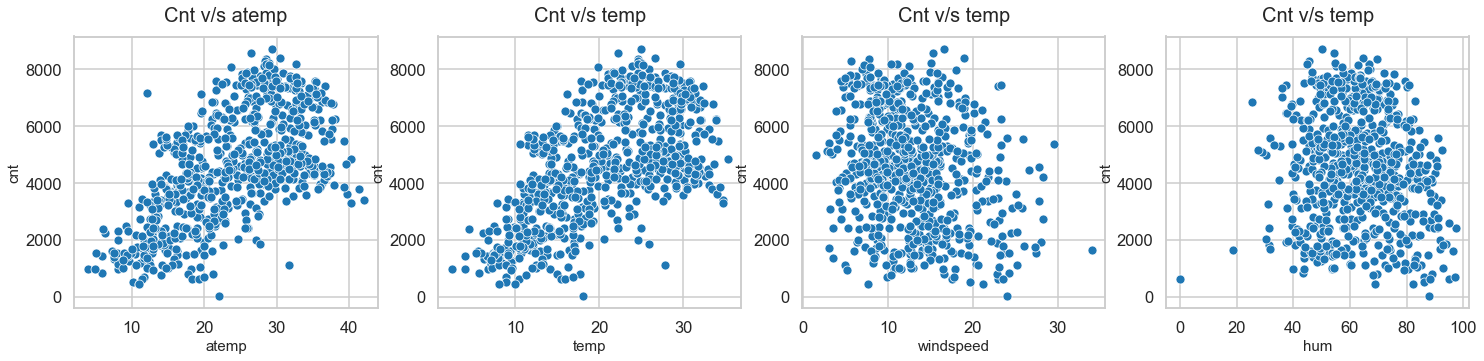

In [14]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 15
fig, ax =plt.subplots(1,4,gridspec_kw={'width_ratios':[20,20,20,20]},figsize=(25,5))

p1= sns.scatterplot(data=shared_bikes, x="atemp", y="cnt",ax=ax[0])
p1.axes.set_title("Cnt v/s atemp")

p2= sns.scatterplot(data=shared_bikes, x="temp", y="cnt",ax=ax[1])
p2.axes.set_title("Cnt v/s temp")

p3= sns.scatterplot(data=shared_bikes, x="windspeed", y="cnt",ax=ax[2])
p3.axes.set_title("Cnt v/s temp")

p4= sns.scatterplot(data=shared_bikes, x="hum", y="cnt",ax=ax[3])
p4.axes.set_title("Cnt v/s temp")


#plt.tight_layout(pad=-6.8)
#plt.subplots_adjust(left=None, bottom=None, right=1.9, top=None, wspace=0.2, hspace=None)
plt.show()

### Inference

-  1) There is a liner relation between number of bike rented and temperature and atemp the warmmer the temp and atemp the more bike get rented

-  2) 'windspeed' shows inverse relationship with rentals


### Visualizing Categorical Variables

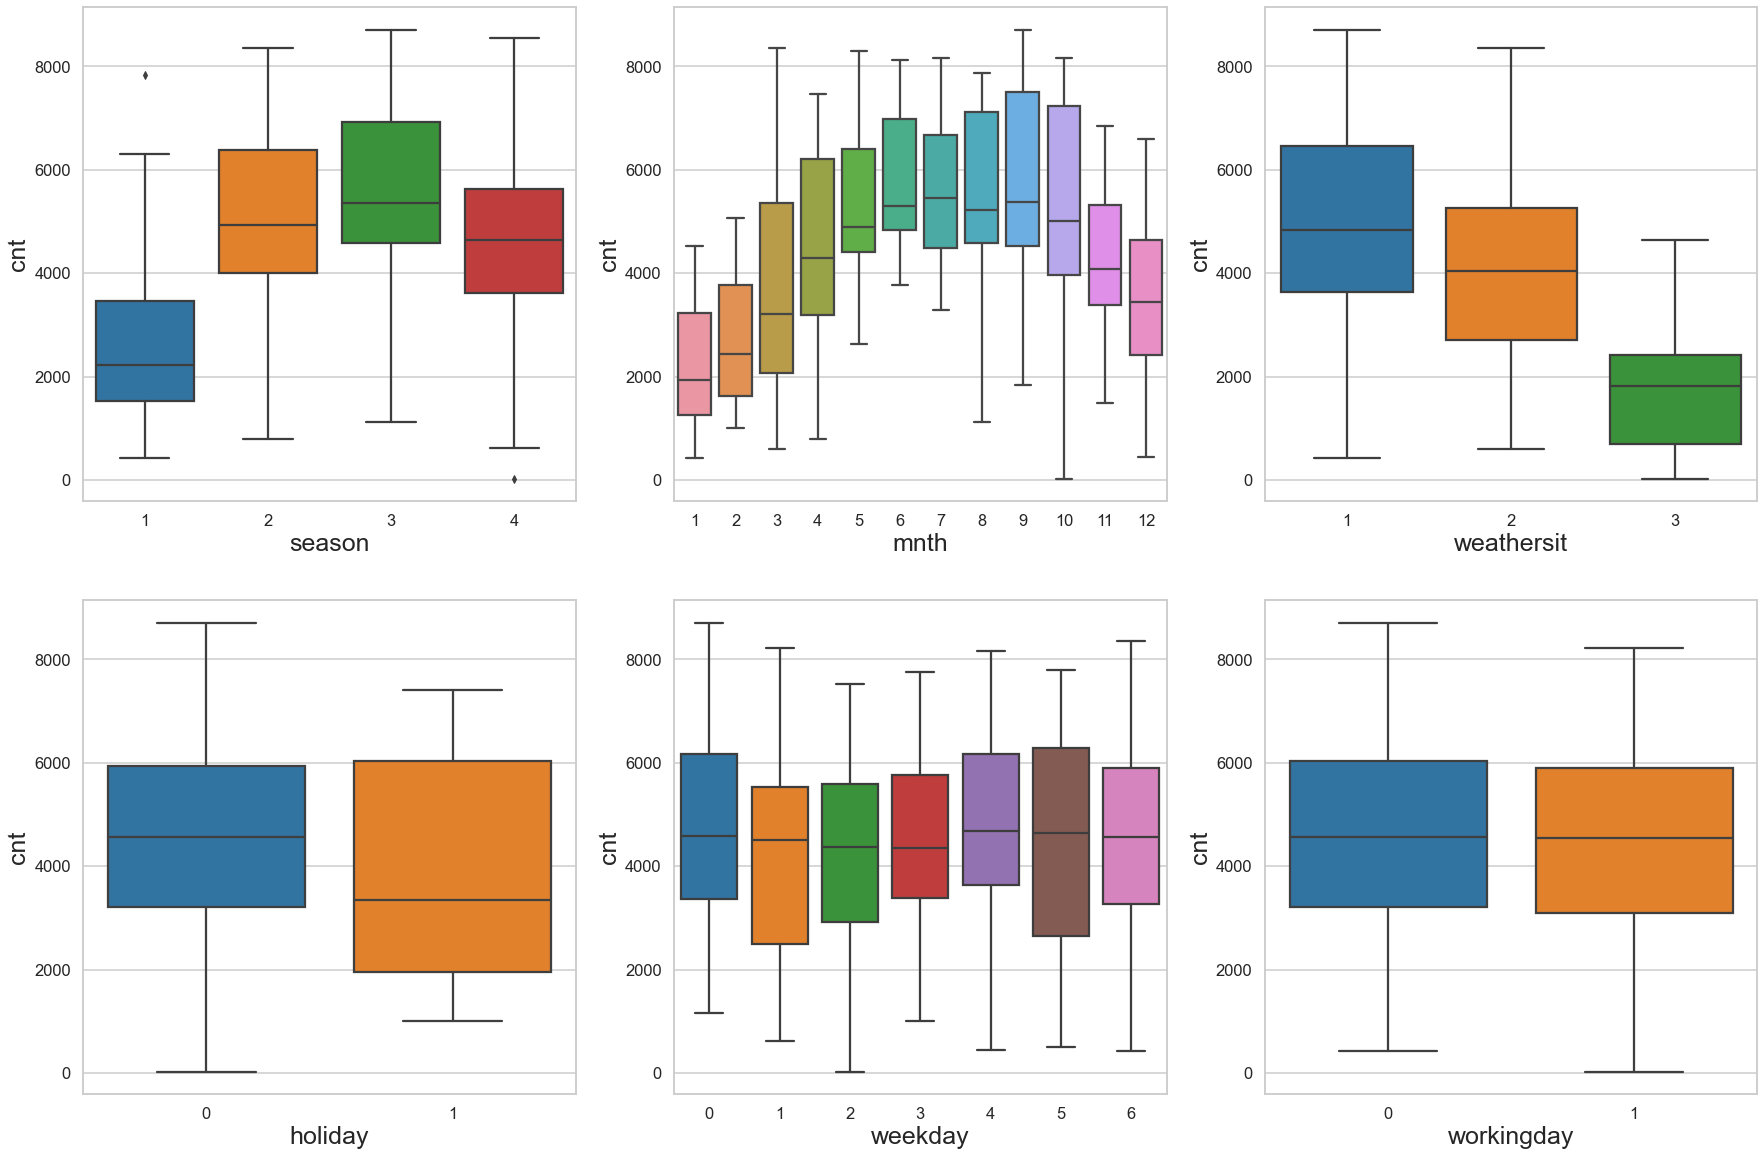

In [15]:
plt.rcParams["axes.labelsize"] = 25
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.titlepad'] = 25
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = shared_bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = shared_bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = shared_bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = shared_bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = shared_bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = shared_bikes)


plt.show()




### categorical variable details 
season : season (1:spring, 2:summer, 3:fall, 4:winter)

weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
        
##### Inference

- 1) Season - seson3 i.e fall is the top season to rent bike. with median above 5000 i.e 5000 bookings. This is followed by season2 i.e summer  & season4 i.e winter  with median i.e bookings between 4000 to 5000.
        - Hence season can be a good predictor for the dependent variable.
- 2) Month - more than 4000 bike booking per month  were happening in the months 5,6,7,8 & 9
        - Hence Month can be a good predictor for dependenat variable.
        
- 3) weathersit - around 5000 bike bookings is happening during ‘weathersit1' i.e Clear, Few clouds, Partly cloudy, Partly cloudy weather. This is followed by weathersit2 i.e Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist with around 4000 bike bookings This indicates, weathersit does show some trend towards the bike bookings and 

        - hence it can be a good predictor for the dependent variable.
    

 
- 4) Weekday: it shows very close trend.
        - Hence , weekday may or may not be a good predictor for the dependent variable.
        
- 5) Holiday: most of the bookings happend on working day 
        - can be consider as good predictor 
        

In [16]:
#•2.working day : redundent with Holiday 

shared_bikes =shared_bikes.drop(['workingday'], axis=1)

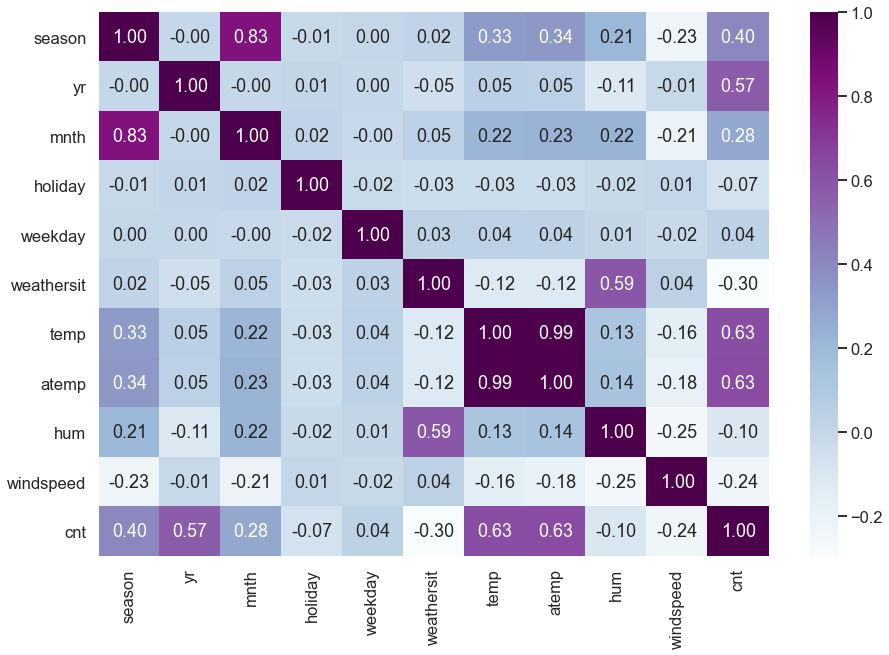

In [17]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70
sns.heatmap(shared_bikes.corr(), cmap="BuPu", annot = True,fmt='.2f')
plt.show()


### Inference 

- 1)From correlation plot, we observed that some features are positively correlated and some are negatively correlated to each other.
- 2)cnt,temp,atemp,casual and registered variables are highly correlated to each other 
        -hence going to ignore these 

###### We will refer this heat map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Step 4: Data Preparation

### Dummy Variables

The variable 'season',mnth ,weathersit and weekday has multiple levels. We need to convert these levels into integer  For this, we will use something called dummy variables.



#### Season


In [18]:
# Defining the map function
def season_var(val):
    if val==1:
        return "spring"
    if val==2:
        return "summer"
    if val==3:
        return "fall"
    if val==4:
        return "winter"
shared_bikes['season_cat'] = shared_bikes.season.apply(season_var)

In [19]:
shared_bikes.head(90)

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,season_cat
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,spring
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,801,spring
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,spring
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,spring
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,spring
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,0,3,0,2,2,10.374763,12.51695,49.3913,12.348100,1693,summer
86,2,0,3,0,3,1,10.838268,12.87870,30.2174,14.217668,2028,summer
87,2,0,3,0,4,1,12.402500,14.64540,31.4167,15.208732,2425,summer
88,2,0,3,0,5,2,12.300000,14.86750,64.6667,11.583496,1536,summer


In [20]:
status = pd.get_dummies(shared_bikes['season_cat'])

In [21]:
# Check what the dataset 'status' looks like
status.head(10)

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [22]:
shared_bikes.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,season_cat
0,1,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,spring
1,1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,801,spring
2,1,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,spring
3,1,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,spring
4,1,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,spring


In [23]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(shared_bikes['season_cat'], drop_first = True)

# Add the results to the original housing dataframe
shared_bikes = pd.concat([shared_bikes, status], axis = 1)



In [24]:
# Drop 'season_cat'and 'season' as we have created the dummies for it

shared_bikes.drop(['season_cat','season'], axis = 1, inplace = True)

In [25]:
shared_bikes.head()

,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### weekday

In [26]:
status_weekday = pd.get_dummies(shared_bikes['weekday'],prefix='weekday')

In [27]:
# Let's drop the first column from status_weekday df using 'drop_first = True'
status_weekday = pd.get_dummies(shared_bikes['weekday'],prefix='weekday', drop_first = True)

# Add the results to the original housing dataframe
shared_bikes = pd.concat([shared_bikes, status_weekday], axis = 1)

In [28]:
# Drop  'weekday' as we have created the dummies for it
shared_bikes.drop(['weekday'], axis = 1, inplace = True)
shared_bikes.head()

,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,1,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0


#### Month

In [29]:
status_month = pd.get_dummies(shared_bikes['mnth'],prefix='mnth')

In [30]:
# Let's drop the first column from status_weekday df using 'drop_first = True'
status_month = pd.get_dummies(shared_bikes['mnth'],prefix='mnth', drop_first = True)

# Add the results to the original housing dataframe
shared_bikes = pd.concat([shared_bikes, status_month], axis = 1)

In [31]:
# Drop  'weathersit' as we have created the dummies for it
shared_bikes.drop(['mnth'], axis = 1, inplace = True)

#### weathersit 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [32]:
status_weathersit = pd.get_dummies(shared_bikes['weathersit'],prefix='weathersit')

In [33]:
# Let's drop the first column from status_weekday df using 'drop_first = True'
status_weathersit = pd.get_dummies(shared_bikes['weathersit'],prefix='weathersit', drop_first = True)

# Add the results to the original housing dataframe
shared_bikes = pd.concat([shared_bikes, status_weathersit], axis = 1)

In [34]:
# Drop  'weathersit' as we have created the dummies for it
shared_bikes.drop(['weathersit'], axis = 1, inplace = True)


In [35]:
shared_bikes.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.336986,0.028767
std,0.500343,0.167266,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.278971,0.473004,0.167266
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5: Splitting the Data into Training and Testing Sets

As we know, the basic step for regression is performing a train-test split


In [36]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(shared_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

###  RESCALING THE FEATURES

If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
As we know, there are two common ways of rescaling:

1.Min-Max scaling 
2.Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

###### library used - from sklearn.preprocessing import MinMaxScaler


In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
653,1,0,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,1,0,0,0,0
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.343137,0.029412
std,0.500429,0.157763,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


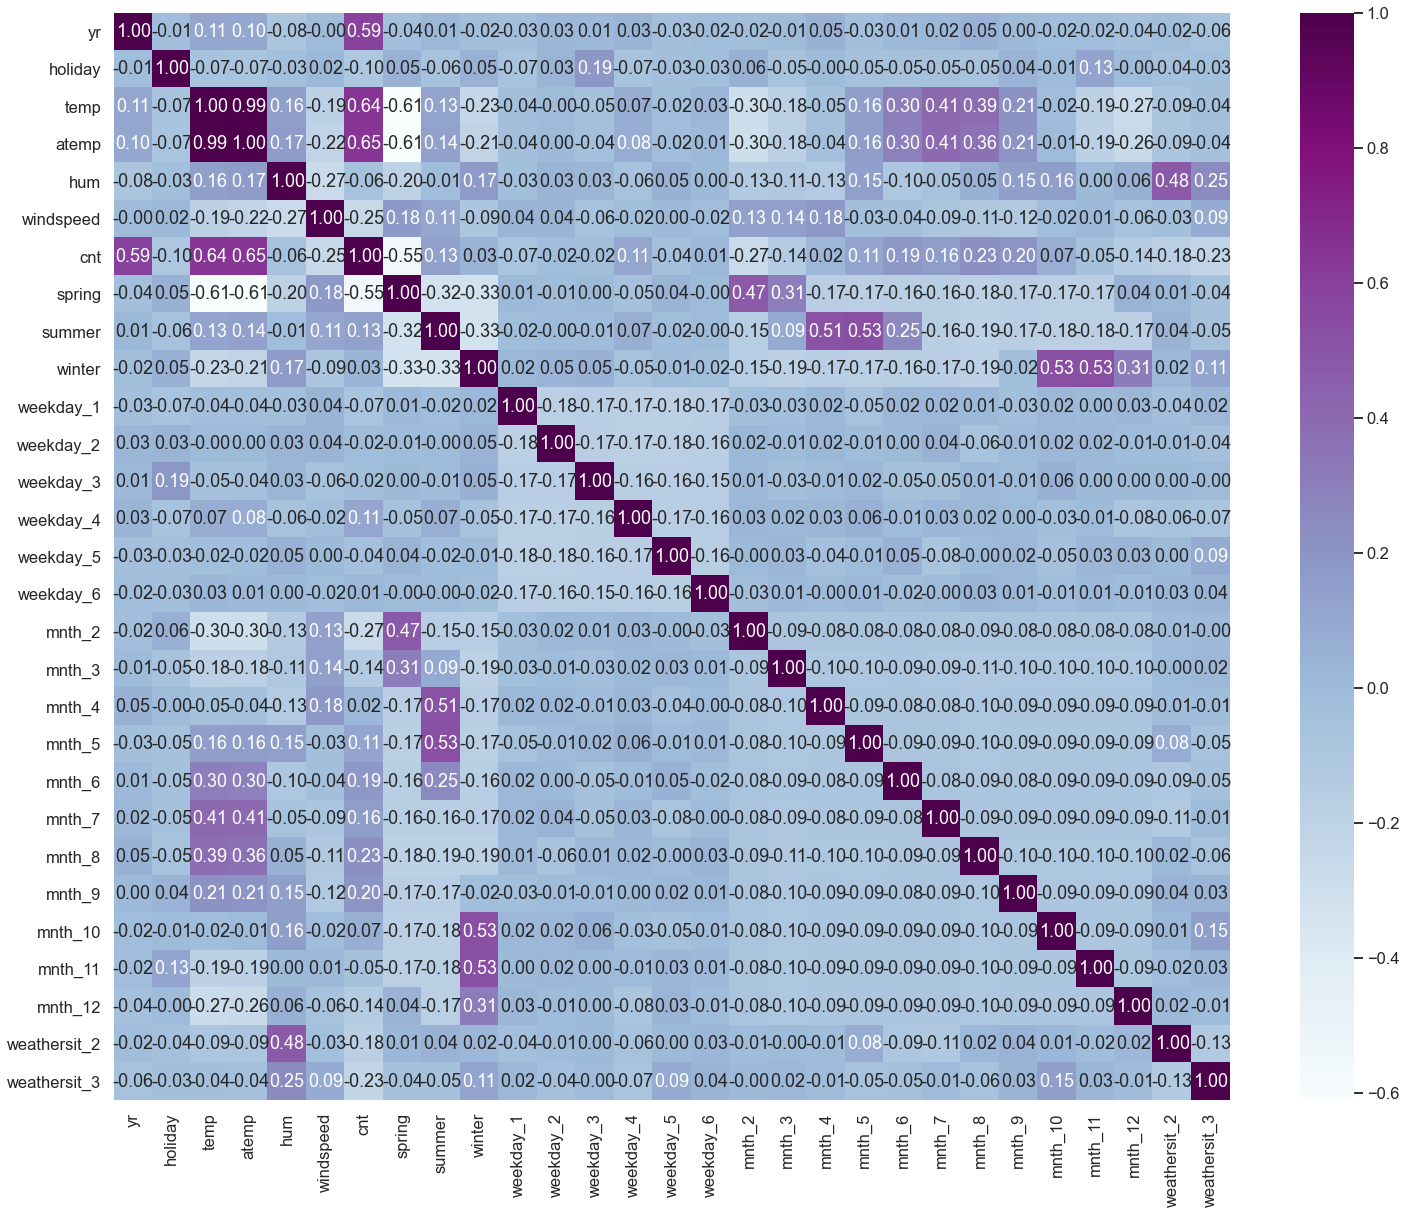

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(25, 20))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 20
sns.heatmap(df_train.corr(), annot = True, cmap="BuPu",fmt='.2f')
plt.show()

### Inference 

- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

- As we have noticed, temp,atemp and yr seems to be correlated to cnt the most.

- to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model we will use this graph

##### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 6: Building a linear model



In [43]:
col = X_train.columns

In [44]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 25 for learning purpose 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,18)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weekday_1', False, 3),
 ('weekday_2', False, 2),
 ('weekday_3', False, 8),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', False, 10),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8',
       'mnth_9', 'mnth_10', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]


Index(['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_2', 'mnth_7', 'mnth_11', 'mnth_12'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [50]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [51]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [52]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.19e-186
Time:                        19:52:58   Log-Likelihood:                 516.67
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     491   BIC:                            -914.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2819      0.036      7.787   

##### Calculate the VIFs for the model

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.34
3,temp,61.71
4,atemp,55.03
8,summer,7.14
7,spring,6.37
9,winter,4.96
12,mnth_5,3.43
11,mnth_4,3.10
13,mnth_6,2.28
5,hum,1.97


In [54]:
X_train_lm1 = X_train_rfe.drop(["temp"], axis = 1)

In [55]:
# Adding a constant variable 

X_train_lm1 = sm.add_constant(X_train_lm1)

lm1 = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.31e-185
Time:                        19:52:58   Log-Likelihood:                 511.51
No. Observations:                 510   AIC:                            -987.0
Df Residuals:                     492   BIC:                            -910.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3038      0.036      8.475   

In [56]:
vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,80.28
7,summer,6.85
6,spring,5.84
8,winter,4.51
3,atemp,4.01
11,mnth_5,3.40
10,mnth_4,3.10
12,mnth_6,2.23
4,hum,1.97
13,mnth_8,1.82


In [57]:
X_train_lm2 = X_train_lm1.drop(["summer"], axis = 1)  ### Drop humidity as close to 2 

In [58]:
# Adding a constant variable 

X_train_lm2 = sm.add_constant(X_train_lm2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.70e-186
Time:                        19:52:59   Log-Likelihood:                 510.96
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     493   BIC:                            -915.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3161      0.034      9.337   

In [59]:
vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,71.56
6,spring,4.00
7,winter,3.63
3,atemp,3.26
4,hum,1.94
9,mnth_4,1.79
12,mnth_8,1.76
10,mnth_5,1.68
11,mnth_6,1.59
15,weathersit_2,1.56


In [60]:
X_train_lm3 = X_train_lm2.drop(["hum"], axis = 1)

In [61]:
# Adding a constant variable 

X_train_lm3 = sm.add_constant(X_train_lm3)

lm3= sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.05e-183
Time:                        19:52:59   Log-Likelihood:                 501.59
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     494   BIC:                            -903.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2286      0.028      8.307   

In [62]:
vif = pd.DataFrame()
X = X_train_lm3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,45.69
5,spring,3.98
6,winter,3.56
3,atemp,3.13
8,mnth_4,1.79
11,mnth_8,1.76
9,mnth_5,1.65
10,mnth_6,1.59
13,mnth_10,1.52
12,mnth_9,1.41


In [63]:
X_train_lm4 = X_train_lm3.drop(["mnth_4"], axis = 1)

In [64]:
# Adding a constant variable 

X_train_lm4 = sm.add_constant(X_train_lm4)

lm4= sm.OLS(y_train,X_train_lm4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          4.49e-183
Time:                        19:52:59   Log-Likelihood:                 497.37
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     495   BIC:                            -901.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2644      0.025     10.699   

In [65]:
vif = pd.DataFrame()
X = X_train_lm4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,36.31
3,atemp,2.88
5,spring,2.75
6,winter,2.55
10,mnth_8,1.52
12,mnth_10,1.52
9,mnth_6,1.39
8,mnth_5,1.36
11,mnth_9,1.28
7,mnth_3,1.18


In [66]:
X_train_lm5 = X_train_lm4.drop(["mnth_8"], axis = 1)

In [67]:
# Adding a constant variable 

X_train_lm5 = sm.add_constant(X_train_lm5)

lm5= sm.OLS(y_train,X_train_lm5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          8.03e-183
Time:                        19:52:59   Log-Likelihood:                 494.03
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     496   BIC:                            -900.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2649      0.025     10.659   

In [68]:
vif = pd.DataFrame()
X = X_train_lm5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.31
5,spring,2.72
3,atemp,2.64
6,winter,2.45
11,mnth_10,1.51
9,mnth_6,1.21
8,mnth_5,1.20
7,mnth_3,1.15
10,mnth_9,1.15
4,windspeed,1.10


In [69]:
X_train_lm6 = X_train_lm5.drop(["mnth_10"], axis = 1)

In [70]:
# Adding a constant variable 

X_train_lm6 = sm.add_constant(X_train_lm6)

lm6= sm.OLS(y_train,X_train_lm6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.28e-182
Time:                        19:53:00   Log-Likelihood:                 490.79
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     497   BIC:                            -900.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2529      0.025     10.313   

In [71]:
vif = pd.DataFrame()
X = X_train_lm6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.97
5,spring,2.66
3,atemp,2.51
6,winter,1.84
8,mnth_5,1.20
9,mnth_6,1.20
7,mnth_3,1.15
10,mnth_9,1.13
4,windspeed,1.10
11,weathersit_2,1.05


In [72]:
X_train_lm7 = X_train_lm6.drop(["mnth_5"], axis = 1)

In [73]:
# Adding a constant variable 

X_train_lm7 = sm.add_constant(X_train_lm7)

lm7= sm.OLS(y_train,X_train_lm7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.51e-182
Time:                        19:53:00   Log-Likelihood:                 486.95
No. Observations:                 510   AIC:                            -949.9
Df Residuals:                     498   BIC:                            -899.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2650      0.024     10.917   

In [74]:
vif = pd.DataFrame()
X = X_train_lm7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.84
5,spring,2.53
3,atemp,2.50
6,winter,1.69
8,mnth_6,1.15
7,mnth_3,1.14
4,windspeed,1.10
9,mnth_9,1.09
11,weathersit_3,1.05
10,weathersit_2,1.04


In [75]:
X_train_lm8 = X_train_lm7.drop(["mnth_6"], axis = 1)

In [76]:
# Adding a constant variable 

X_train_lm8 = sm.add_constant(X_train_lm8)

lm8= sm.OLS(y_train,X_train_lm8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.67e-183
Time:                        19:53:00   Log-Likelihood:                 486.43
No. Observations:                 510   AIC:                            -950.9
Df Residuals:                     499   BIC:                            -904.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2649      0.024     10.912   

In [77]:
vif = pd.DataFrame()
X = X_train_lm8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.84
5,spring,2.52
3,atemp,2.44
6,winter,1.67
7,mnth_3,1.13
4,windspeed,1.10
8,mnth_9,1.07
10,weathersit_3,1.05
9,weathersit_2,1.04
1,yr,1.02


### Inference -

• This model looks good as there is very low multicollinearuty between the predictors.based on the VIF score 
- p-values for all the predictors seems to be significant.i,e <0.05
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic:  239.1

Prob (F-statistic): 3.67e-183



In [78]:
X_train_lm8.columns

Index(['const', 'yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter',
       'mnth_3', 'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [79]:
X_train_new = X_train_lm8.drop(['const'], axis=1)
X_train_new.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'spring', 'winter', 'mnth_3',
       'mnth_9', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X =X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.91
2,atemp,3.70
0,yr,2.05
4,spring,1.74
8,weathersit_2,1.50
5,winter,1.38
6,mnth_3,1.25
7,mnth_9,1.16
9,weathersit_3,1.08
1,holiday,1.05


Inference
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as values are <5

In [81]:
lm8.params

const           0.264907
yr              0.236037
holiday        -0.089602
atemp           0.425328
windspeed      -0.127715
spring         -0.127401
winter          0.043754
mnth_3          0.038005
mnth_9          0.073134
weathersit_2   -0.079238
weathersit_3   -0.286661
dtype: float64

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
y_train_cnt = lm8.predict(X_train_lm8)

In [83]:
#Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

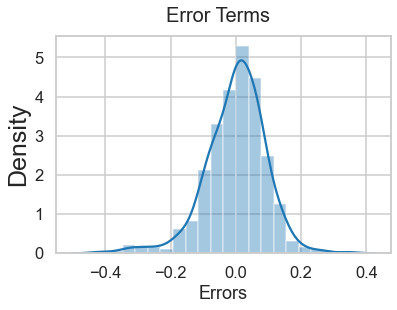

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Inference - 

- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

# Making Predictions


Applying the scaling on the test sets

In [85]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [86]:

df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.319635,0.027397
std,0.500722,0.188034,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test


In [88]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
# Making predictions
y_test_pred = lm8.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

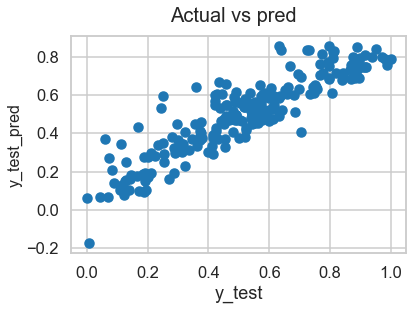

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [92]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
round(r2,3)

0.8

In [93]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),3)
adjusted_r2

0.77

###  Insights on Final model 


##### Train dataset 

- R-Squared value of Train Dataset is 0.827
- Adjusted R-Squared value of Train Dataset is 0.824

##### Test dataset 

- R-Squared value of Test Dataset is 0.80
- Adjusted R-Squared value of Test Dataset is 0.77


### The equation of best fitted surface based on final model  :

 cnt = 0.2649+yr(0.2649)-holiday(0.0896)+atemp(0.4253)-windspeed(0.1277)-spring(0.1274)+winter(0.0438)+mnth_3(0.0380)+mnth_9(0.0731)-weathersit_2(0.0792)-weathersit_3(0.2867)
 

### Interpretation - 

- 1) yr - a unit increase in yr variable, increases the bike hire numbers by 0.2649 units.
- 2) holiday - no of bike hire decreases on holiday 
- 3) atemp - a unit increase in atemp variable, increases the bike hire numbers by 0.4253 units.
- 4) windspeed -  a unit increase in windspeed variable decreases the bike hire numbers by 0.1277 units.
- 5) spring - bike rental is decreased in Spring by 0.1274
- 6) winter - bike rental is increased in winter by 0.0438
- 7) month_3 - bike rental is increased in month3  by 0.0380 (which is just at the begining of spring and then reduces during spring (based on point 5 ) ) 
- 8) mnth_9 - bike rental is increased in month 9 0.0731
- 9) weathersit_2 - bike rental is decreased when weather conditions are Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist weather 
- 10) weathersit_3 - bike rental is decreased when weather conditions are Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds